# Usage (details: set phases)
Here, how to set phases in scenario analysis will be explained. As an example, use the records in India.

## Preperation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.5.4-alpha.new.75'

In [3]:
# Load datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu(verbose=False)
population_data = data_loader.population(verbose=False)
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [4]:
# Create instance of `Scenario` class
scenario = cs.Scenario(jhu_data, population_data, country="India", province=None)

In [5]:
# Summarize
scenario.summary()

,Type,Start,End,Population
0th,Past,13Feb2020,21Jul2020,1352617328


At this point, the observation dates are registered as 0th phase. For the explanation, we will fix the first/end date of the records. This is un-necessary for your analysis.

In [6]:
# Fix the first date of records
scenario.first_date = "01Mar2020"
# Fix the last date of records
scenario.last_date = "20Jul2020"
# Summarize
scenario.summary()

,Type,Start,End,Population
0th,Past,01Mar2020,20Jul2020,1352617328


## Set phases with S-R trend analysis
As explained in [S-R trend analysis section in "Kaggle: COVID-19 data with SIR model"](https://www.kaggle.com/lisphilar/covid-19-data-with-sir-model#S-R-trend-analysis), $S$ (Susceptible) and $R$ (Recovered) shows the following relationship in SIR-derived models. $S(R)$ means that $S$ as a function of $R$.
$$S(R) = N e^{-a R}$$
where $N$ is total population and $a=\cfrac{\beta}{N \gamma}$ is a constant.  
This leads to
$$\log S(R) = - a R + \log N$$

$\log S$ decreases constantly with increase of $R$, when the records follow a SIR-derived model and the parameter values of the model are constant values. Plot of $(x, y) = (R, S)$ with logarithmic y-axis scale shows a line. 

So, the slope of the line may change when the parameter values ($\beta$ and $\gamma$) were changed. To detect the dates when the parameter values were changed, we will find the change points of $\log S$ as a function of $R$, using [ruptures: change point detection in Python](https://github.com/deepcharles/ruptures).

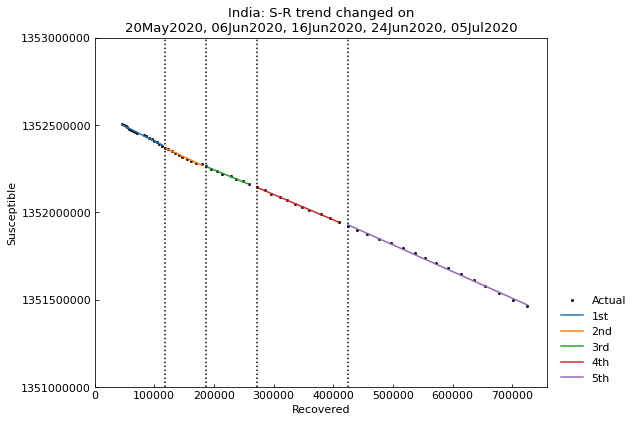

In [15]:
scenario.trend(set_phases=True, include_init_phase=False)

We found five change points from 01May2020 to 20Jul2020. This means that there 6 phases (0th, 1st, 2nd,...5th). Here, we removed 0th phase because the number of cases is small in 0th phase and may not show SIR-like trend.

In [14]:
scenario.summary()

,Type,Start,End,Population
0th,Past,01Mar2020,20Jul2020,1352617328
1st,Past,20May2020,05Jun2020,1352617328
2nd,Past,06Jun2020,15Jun2020,1352617328
3rd,Past,16Jun2020,23Jun2020,1352617328
4th,Past,24Jun2020,04Jul2020,1352617328
5th,Past,05Jul2020,20Jul2020,1352617328


## (Optional) Remove un-necessary change points manually
The slope of 4th seems to equal to that of 3rd phase. Here, we will combine 3rd phase and 4th phase here and reset phase names.

In [9]:
scenario.combine(phases=["3rd", "4th"])
scenario.summary()

,Type,Start,End,Population
1st,Past,20May2020,05Jun2020,1352617328
2nd,Past,06Jun2020,15Jun2020,1352617328
3rd,Past,16Jun2020,04Jul2020,1352617328
4th,Past,05Jul2020,20Jul2020,1352617328


Show the trend with manually set change points.

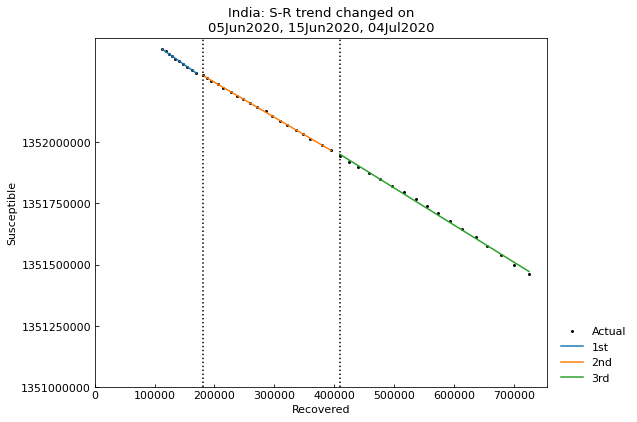

In [10]:
scenario.trend(set_phases=False)

## (Optional) Add new change points manually

In [11]:
scenario.add_phase(end_date="28May2020")
scenario.summary()

ValueError: @start_date is Future, but @end_date is Past.

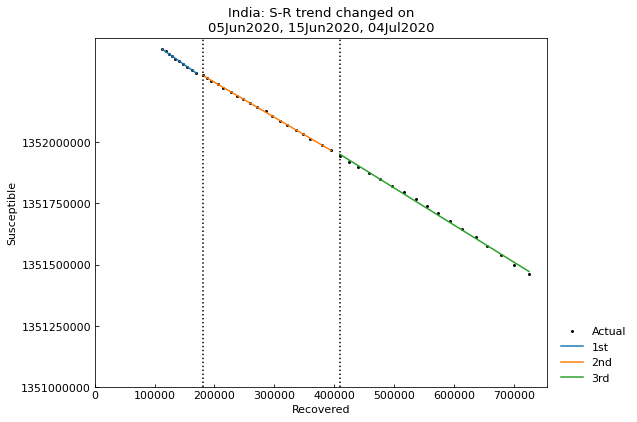

In [12]:
scenario.trend(set_phases=False)